<h1><center>Students performance and difficulties prediction</center></h1>

<h1><span style='color:#b846a3;font-family:Comic Sans MS'>Objectives :</span></h1>

In this notebook, we will  :

- **Predict whether or not a student will pass the final exam based on certain information given**
- **Compare the three learning algorithms**
- **Find out what most affects student achievement**
- **Find the best algorithm with high accuracy**

We will be using three learning algorithms:

- **Logistic regression**
- **Supported vector machine**
- **KNN**

# Reading data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving student-data.csv to student-data.csv


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report
from astropy.table import Table
from sklearn.metrics import roc_auc_score

df = pd.read_csv('student-data.csv')
dfv = pd.read_csv('student-data.csv')

# **Data  **

**Before process the dataset let's describe it briefly:**

- *For the sake of applying our skills in machine learning, we will choose an appropriate dataset for our problematic* :<br><br>

    - This dataset approach students achievement in secondary education of two Portuguese schools.

    - The shape of our data set is **(395 rows × 31 columns)**.

    - **No missing** values in the data, so we do not have to process lines with missing values.

    - The data attributes **include demographic**, social and school related features and it was collected by using school reports and questionnaires. In the following cell we will describe each attribute.

    - **The last column tells us whether or not the student passed the final exam**.

    - The dataset is taken from : https://archive.ics.uci.edu/ml/datasets/student+performance
    
**Now let's explain every column in the dataframe**
- `school` : student's school (binary: "GP" or "MS")
- `sex` : student's sex (binary: "F" - female or "M" - male)
- `age` : student's age (numeric: from 15 to 22)
- `address` : student's home address type (binary: "U" - urban or "R" - rural)
- `famsize` : family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
- `Pstatus` : parent's cohabitation status (binary: "T" - living together or "A" - apart)
- `Medu` : mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- `Fedu` : father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- `Mjob` : mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- `Fjob` : father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- `reason` : reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
- `guardian` : student's guardian (nominal: "mother", "father" or "other")
- `traveltime` : home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- `studytime` : weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- `failures` : number of past class failures (numeric: n if 1<=n<3, else 4)
- `schoolsup` : extra educational support (binary: yes or no)
- `famsup` : family educational support (binary: yes or no)
- `paid` : extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- `activities` : extra-curricular activities (binary: yes or no)
- `nursery` : attended nursery school (binary: yes or no)
- `higher` : wants to take higher education (binary: yes or no)
- `internet` : Internet access at home (binary: yes or no)
- `romantic` : with a romantic relationship (binary: yes or no)
- `famrel` : quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- `freetime` : free time after school (numeric: from 1 - very low to 5 - very high)
- `goout` : going out with friends (numeric: from 1 - very low to 5 - very high)
- `Dalc` : workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- `Walc` : weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- `health` : current health status (numeric: from 1 - very bad to 5 - very good)
- `absences` : number of school absences (numeric: from 0 to 93)

**The last column:**
- `passed` : did the student pass the final exam or not (binary: yes or no)

**Displaying the dataset**

In [4]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,yes


# ** Data processing **

**Before working with any dataset we have to process that dataset so it will be ready for training our models**. **All functions that will be used will be described in the following cell**. 

- **1)** Sometimes, datasets came up with non numerical values and it is impossible to give it to any classifier. So our job is to convert non numeric values to numerical ones. And we will do that by calling:

```python
def numerical_data()
```
     - This function will map each string to an appropriate integer. 
<br>
     
 - **2)**Feature Scaling - https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. Just to give you an example — if you have multiple independent variables like age, salary, and height; With their range as (18–100 Years), (25,000–75,000 Euros), and (1–2 Meters) respectively, feature scaling would help them all to be in the same range, for example- centered around 0 or in the range (0,1) depending on the scaling technique.

```python
def feature_scaling(df)
```
       - This function take the dataset as an argument and replace each column, let's say 'col',to :    
$$\frac{col-mean(col)}{max(col)}$$, where $mean$ : the mean or the average.
        
        - But this is not the only scaling you do, it turns out the following equation works well to:    
$$\frac{col-mean(col)}{std(col)}$$, where $std$ : the standard deviation.

In [6]:
# mapping strings to numeric values:
def numerical_data():
    df['school'] = df['school'].map({'GP': 0, 'MS': 1})
    df['sex'] = df['sex'].map({'M': 0, 'F': 1})
    df['address'] = df['address'].map({'U': 0, 'R': 1})
    df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1})
    df['Pstatus'] = df['Pstatus'].map({'T': 0, 'A': 1})
    df['Mjob'] = df['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['Fjob'] = df['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['reason'] = df['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
    df['guardian'] = df['guardian'].map({'mother': 0, 'father': 1, 'other': 2})
    df['schoolsup'] = df['schoolsup'].map({'no': 0, 'yes': 1})
    df['famsup'] = df['famsup'].map({'no': 0, 'yes': 1})
    df['paid'] = df['paid'].map({'no': 0, 'yes': 1})
    df['activities'] = df['activities'].map({'no': 0, 'yes': 1})
    df['nursery'] = df['nursery'].map({'no': 0, 'yes': 1})
    df['higher'] = df['higher'].map({'no': 0, 'yes': 1})
    df['internet'] = df['internet'].map({'no': 0, 'yes': 1})
    df['romantic'] = df['romantic'].map({'no': 0, 'yes' : 1})
    df['passed'] = df['passed'].map({'no': 0, 'yes': 1})
    # reorder dataframe columns :
    col = df['passed']
    del df['passed']
    df['passed'] = col

    
# feature scaling will allow the algorithm to converge faster, large data will have same scal
def feature_scaling(df):
    for i in df:
        col = df[i]
        # let's choose columns that have large values
        if(np.max(col)>6):
            Max = max(col)
            Min = min(col)
            mean = np.mean(col)
            col  = (col-mean)/(Max)
            df[i] = col
        elif(np.max(col)<6):
            col = (col-np.min(col))
            col /= np.max(col)
            df[i] = col

**digitization of values**

In [7]:
# All values in numerical after calling numerical_data() function
numerical_data()
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,1,18,0,1,1,4,4,3,0,2,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,0
1,0,1,17,0,1,0,1,1,3,4,2,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,0
2,0,1,15,0,0,0,1,1,3,4,3,0,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,1
3,0,1,15,0,1,0,4,2,1,2,0,0,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,1
4,0,1,16,0,1,0,3,3,4,4,0,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,1


    - Now, all the values in the dataset are numerical.

**Features scalling**

In [8]:
# Let's scal our features
feature_scaling(df)

# Now we are ready for models training
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0.0,1.0,0.059264,0.0,1.0,1.0,1.00,1.00,0.75,0.0,0.666667,0.0,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.003882,0.0
1,0.0,1.0,0.013809,0.0,1.0,0.0,0.25,0.25,0.75,1.0,0.666667,0.5,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.5,-0.022785,0.0
2,0.0,1.0,-0.077100,0.0,0.0,0.0,0.25,0.25,0.75,1.0,1.000000,0.0,0.000000,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.5,0.057215,1.0
3,0.0,1.0,-0.077100,0.0,1.0,0.0,1.00,0.50,0.25,0.5,0.000000,0.0,0.000000,0.666667,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.0,-0.049451,1.0
4,0.0,1.0,-0.031646,0.0,1.0,0.0,0.75,0.75,1.00,1.0,0.000000,0.5,0.000000,0.333333,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.0,-0.022785,1.0


# Data visualisation   </h5>

## 1) data inspection

In [9]:
df.shape

(395, 31)

In [10]:
df.dropna().shape # their is no null value "fortunately:)"

(395, 31)

In [11]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [ ]:
features=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']

## 2)features visualisation


-firstly we are going to look deeper into each features by using multiple methods of visualisation such as distribution plot ,Density...
After the visualisation we are going to understand wish features are most impactfull for  student's performances.

If you are students,parents or teachers and you care about your kids or students academic performances you might want to have attention for next lectures, wi will provides you with  summary of how you can achieve best social,demographic and school conditions to boost their academics potentials.

In [ ]:
#plot of student status
dfv['passed'].value_counts()

yes    265
no     130
Name: passed, dtype: int64

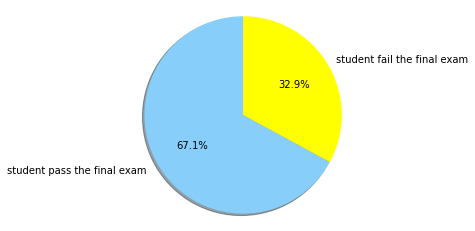

In [12]:
labels = 'student pass the final exam ', 'student fail the final exam'
sizes = [265, 130]
colors=['lightskyblue','yellow']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

 ### a)Correlation heatmap

   #### -a.1) general hetmap
   Heatmap:
Heatmap is one good visualization technique used to compare any 2 variables/features with respective to the values. The heatmap from seaborn library will create a grid like plot along with an optional color bar
For eg. Weekly performance chart of different companies can be plotted using heatmaps
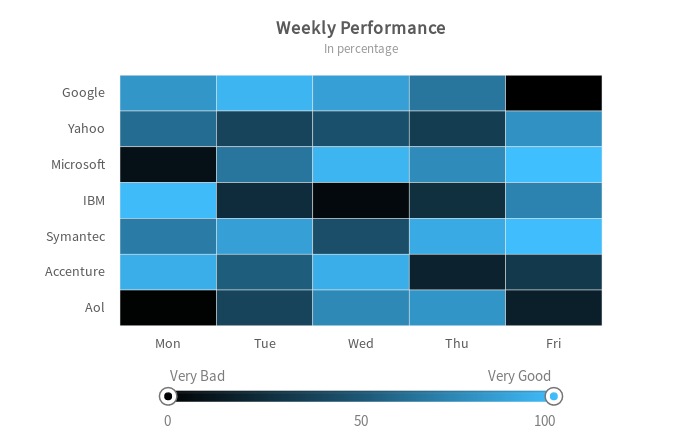

Text(0.5, 1.0, 'Correlation Heatmap')

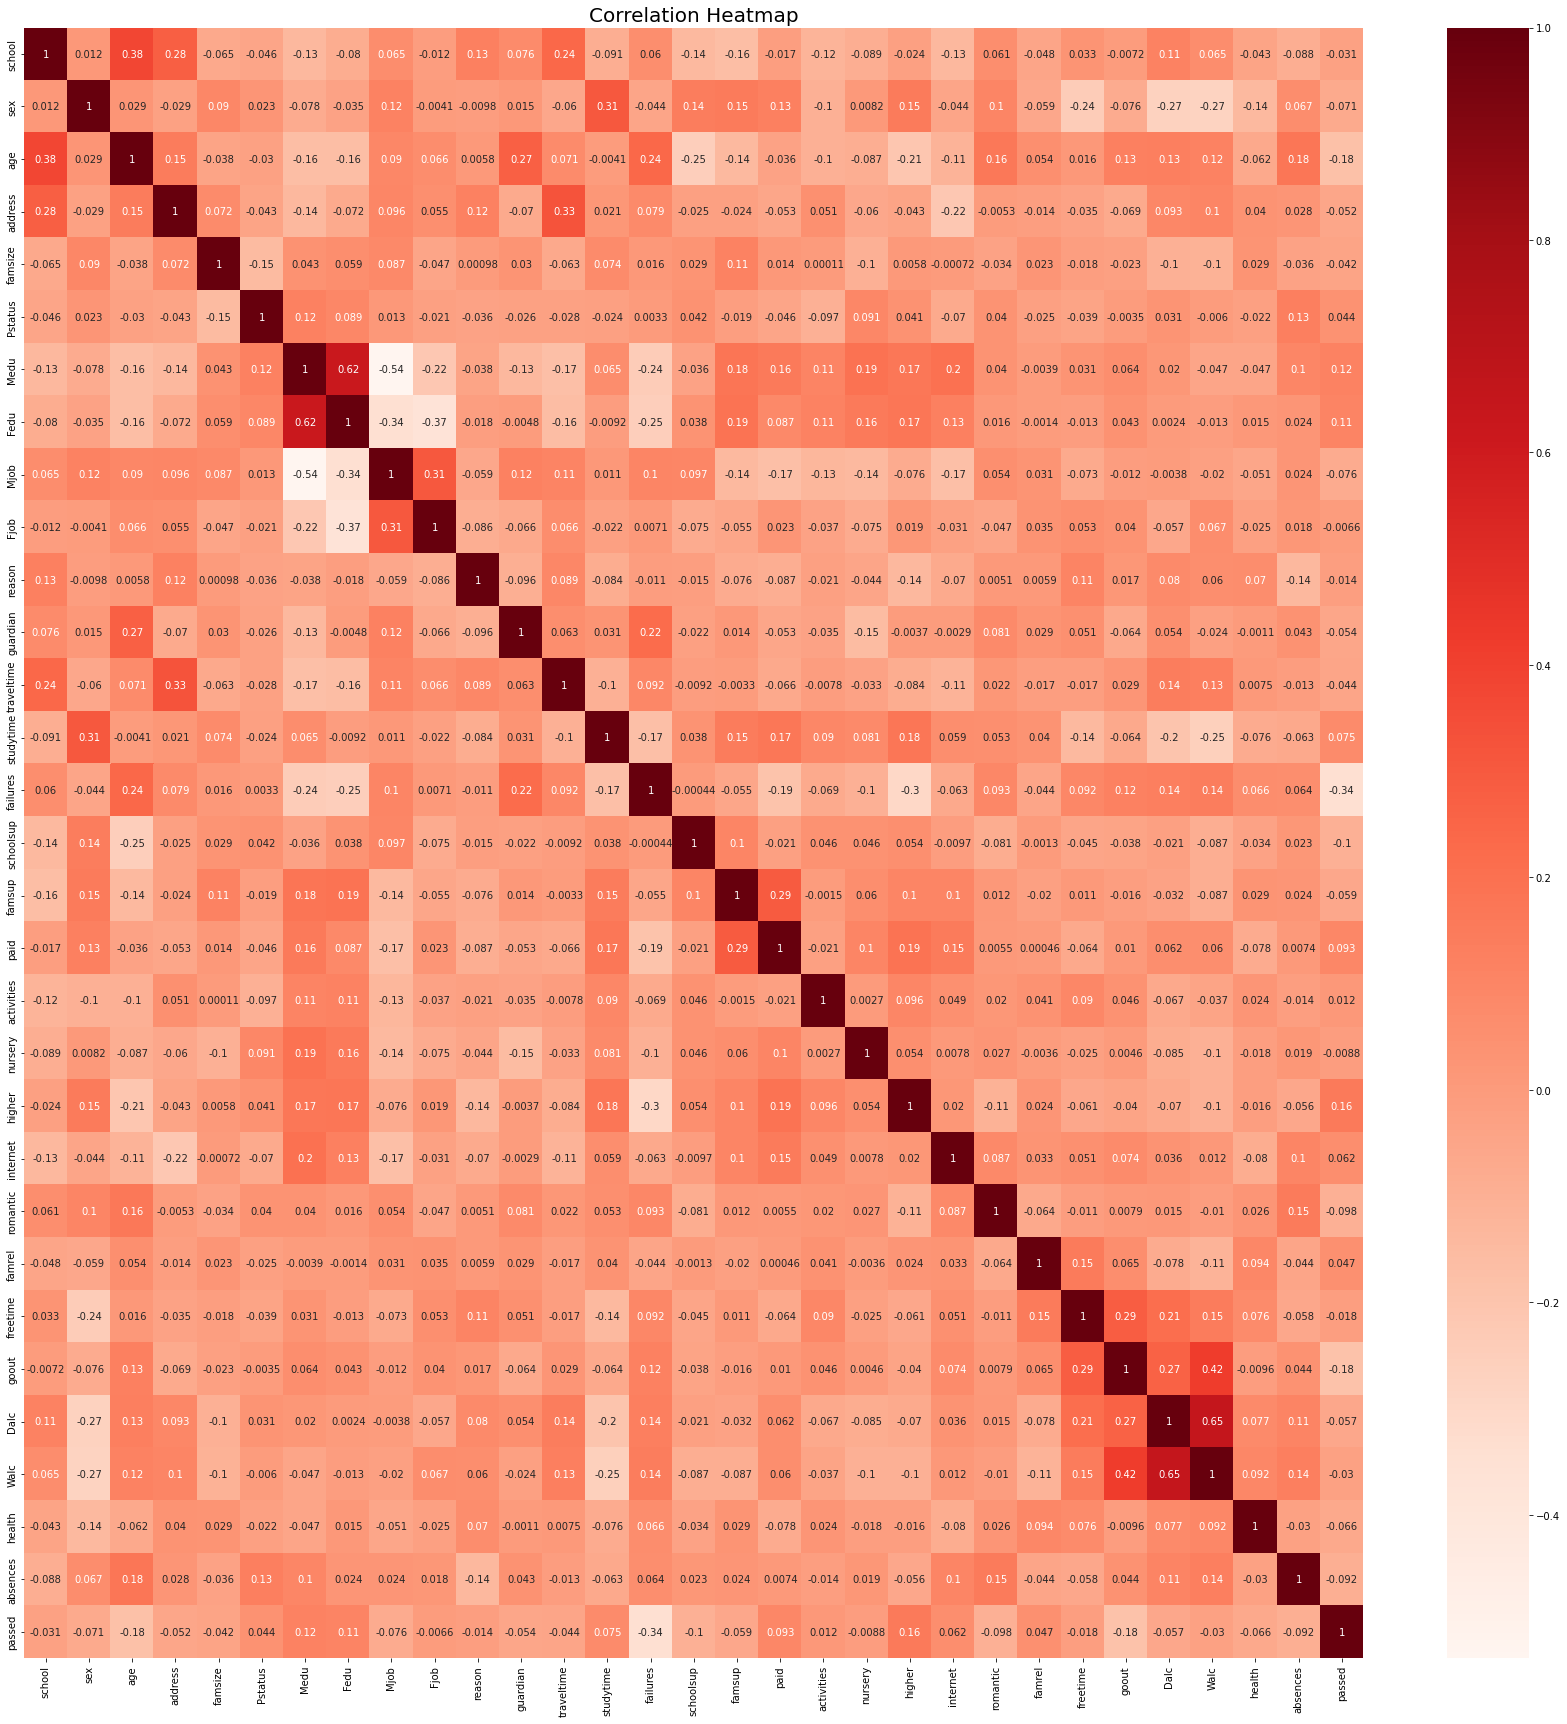

In [ ]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

#### a.2)correlation between student status and other features

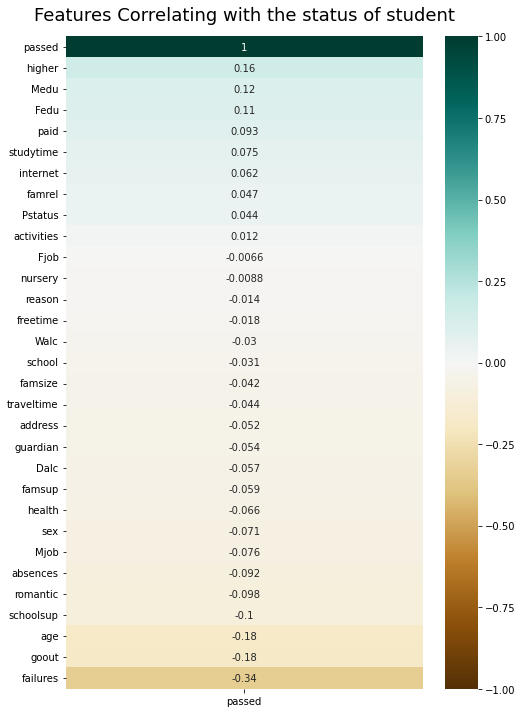

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['passed']].sort_values(by='passed', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the status of student', fontdict={'fontsize':18}, pad=16);

C0:Based on this heatmap we can do a quiq conclusion about most impactfull features on student status:

**tree most impactfull (positively) features**:

-mother and father with height education had a positif impact on student performance

-the students who wants to take higher education are having also good grades sow it could be better to tell student how great and fun to take higher education 

**tree most impactfull (negatively) features**:

-going out with friends to much hours can impact badely

-age and failures are other features that also impact negatively the student performances.

In next steps we will confirm this conclusions by using distribution plot,density graphs.....

### b) Distribution plot

In this step let's look deeper into each features and make a final summary for best social,demographic and school conditions.

#### b.1) Student status  By goout

In [13]:
df["goout"].unique()

array([0.75, 0.5 , 0.25, 0.  , 1.  ])

<function <lambda> at 0x7fc971246200>
goout   0.00  0.25  0.50  0.75  1.00
passed                              
0.0        6    24    37    38    25
1.0       17    79    93    48    28


Text(0.5, 0, 'Student status')

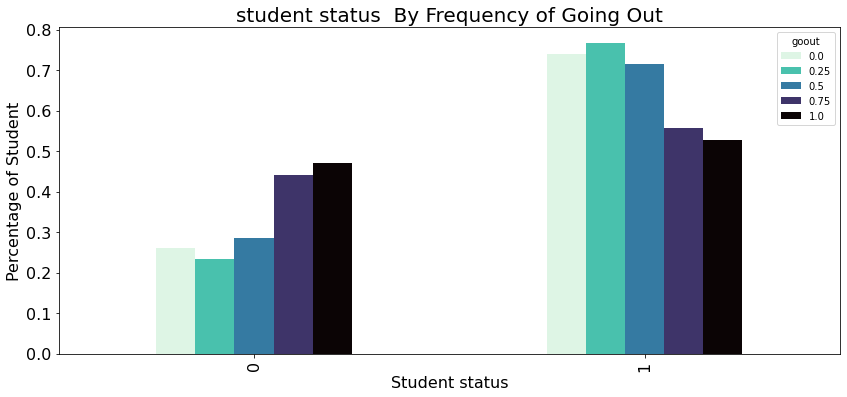

In [14]:
# going out
perc = (lambda col: col/col.sum())
print(perc)
index = [0,1]
out_tab = pd.crosstab(index=df.passed, columns=df.goout)
print(out_tab)
out_perc = out_tab.apply(perc).reindex(index)
out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('student status  By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Student status', fontsize=16)

-C1: it seems that most of people who passed the exam had less hour of going out ,as a conclusion we should limit the hour of going out with friend



#### b.2)Student status by  mother job and mother education:

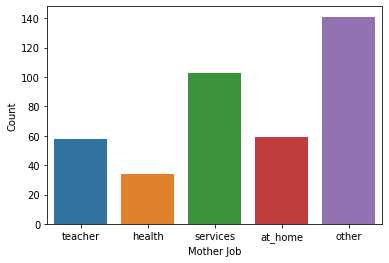

In [15]:
# 1) mother job 
# Mjob distribution
f, fx = plt.subplots()
figure = sns.countplot(x = 'Mjob', data=dfv, order=['teacher','health','services','at_home','other'])
fx = fx.set(ylabel="Count", xlabel="Mother Job")
figure.grid(False)

<Figure size 432x288 with 0 Axes>

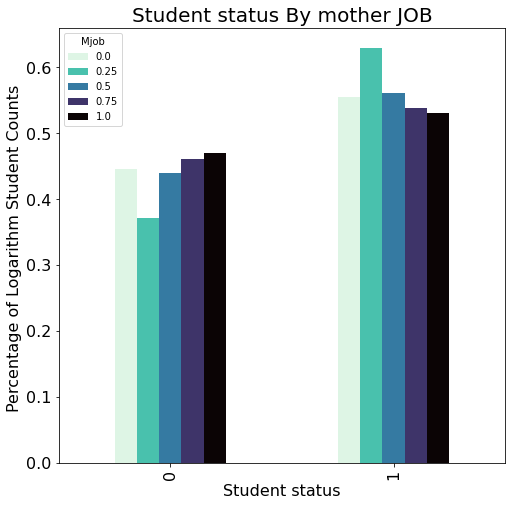

In [16]:
mjob_tab1 = pd.crosstab(index=df.passed, columns=df.Mjob)
mjob_tab = np.log(mjob_tab1)
mjob_perc = mjob_tab.apply(perc).reindex(index)
plt.figure()
mjob_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(8,8))
plt.title('Student status By mother JOB', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.show()
#'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4

C3:It's seems that students who's mother work as doctor reach good status

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 0, 'Mother Education Level')

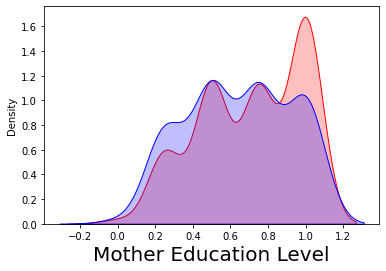

In [17]:
#Mother education:
good = df.loc[df.passed==1]
poor=df.loc[df.passed==0]
good['good_student_mother_education'] = good.Medu
poor['poor_student_mother_education'] = poor.Medu
plt.figure(figsize=(6,4))
p=sns.kdeplot(good['good_student_mother_education'], shade=True, color="r")#good_student in red
p=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b")#poor_student in blue
plt.xlabel('Mother Education Level', fontsize=20)

C4:Mother height education had good impact in student status.If we look into the second heatmap previousely it seems that Medu is more impactfful than Fedu sow if you are woman study hard ,if you are man marry a woman with higher education.


#### b.3)Student status by deseire to take heigher education:

Text(0, 0.5, 'Percentage of Student')

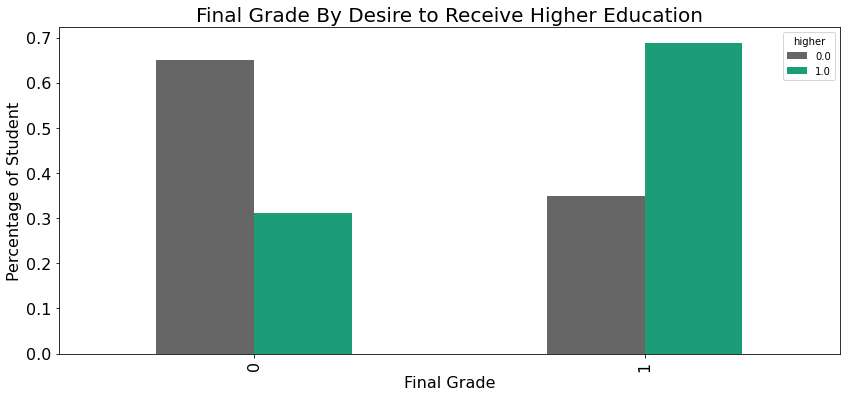

In [ ]:
higher_tab = pd.crosstab(index=df.passed, columns=df.higher)
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

C4:Most of people who passed the exam want to take heigher education sow it could be a good idea to encourage your kids or students to take heigher education.

#### b.5)Student status by age 

Text(0, 0.5, 'Percentage of Student')

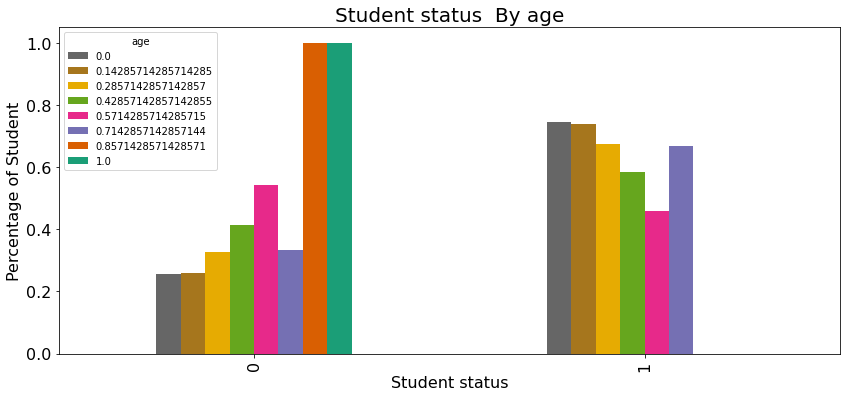

In [ ]:
#impact of age
higher_tab = pd.crosstab(index=df.passed, columns=df.age)
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Student status  By age', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)


C5:Age also play an importent role in student sucess, most of people who passed the exam had early age 15, and most people who failed the exam had an age of 22 .As a conclusion it could be better to go to school in early age.

#### b.6) Student status by failures:

In [ ]:
#impact of failures

failures  0.000000  0.333333  0.666667  1.000000
passed                                          
0             0.25      0.52  0.823529      0.75
1             0.75      0.48  0.176471      0.25


Text(0, 0.5, 'Percentage of Student')

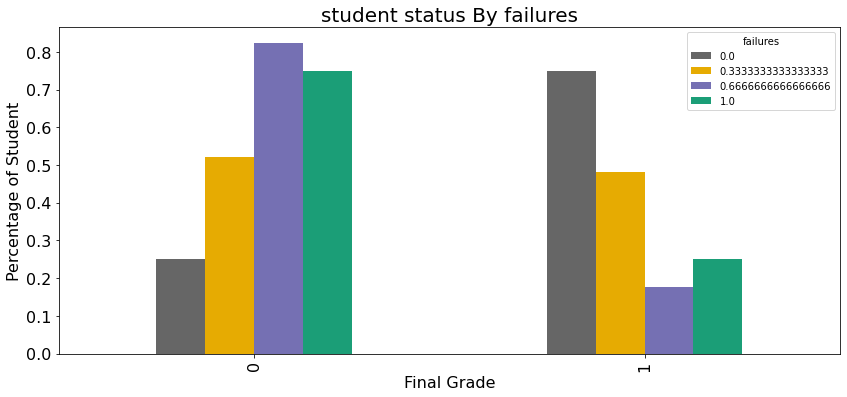

In [ ]:
fail_tab = pd.crosstab(index=df.passed, columns=df.failures)
fail_perc = fail_tab.apply(perc).reindex(index)
print(fail_perc)
fail_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By failures', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

C6:most of people who passed the exam had 0failures sow it could be a good choice to study hard and pass all the grades

#### b.7) Student status by area


Text(0.5, 1.0, 'Address Distribution')

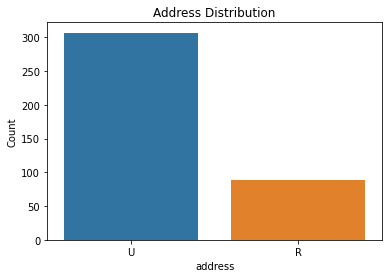

In [ ]:
#first let's see the destribution of students who live in urban or rural area
f, fx = plt.subplots()
figure = sns.countplot(x = 'address', data=dfv, order=['U','R'])
fx = fx.set(ylabel="Count", xlabel="address")
figure.grid(False)
plt.title('Address Distribution')

Text(0.5, 0, 'Student status')

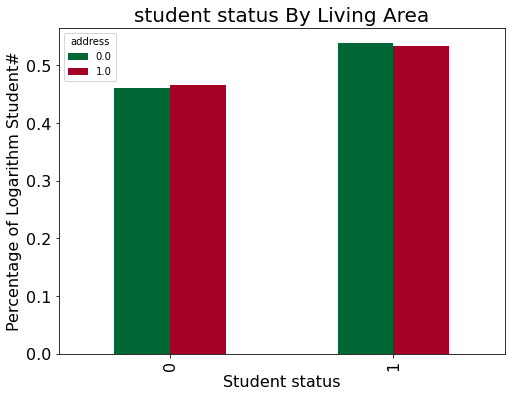

In [ ]:
ad_tab1 = pd.crosstab(index=df.passed, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)
ad_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.title('student status By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Student status', fontsize=16)

C7:Area doesn't had an impact on student performance even people with good results live in contry side

#### b.8) Student status by alchool consumption :

<img src='plots\visualisation.images\alc.jpg' width='400cm' height='400cm'>

Text(0, 0.5, 'Percentage of Student')

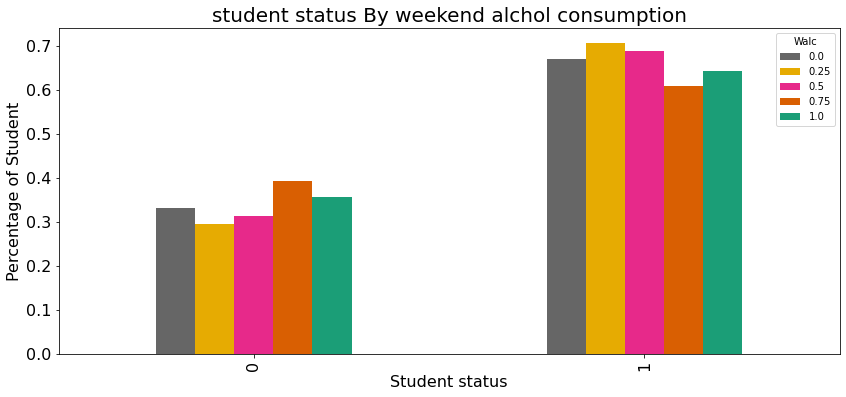

In [ ]:
#impact of weekend alcohol consumption in student performance
alc_tab = pd.crosstab(index=df.passed, columns=df.Walc)
alc_perc = alc_tab.apply(perc).reindex(index)
alc_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By weekend alchol consumption', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

<ipython-input-27-3df7c3a0a2b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['good_alcohol_usage']=good.Walc
<ipython-input-27-3df7c3a0a2b6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor['poor_alcohol_usage']=poor.Walc


Text(0.5, 0, 'Level of Alcohol Consumption')

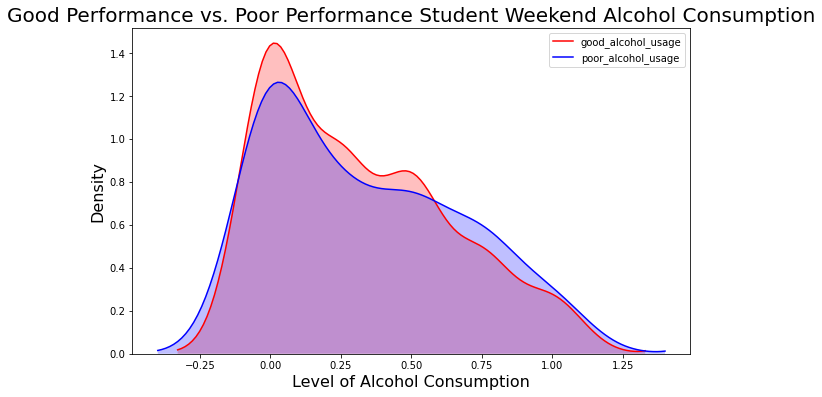

In [ ]:
# weekend alcohol consumption
# create good student dataframe
good = df.loc[df.passed == 1]
good['good_alcohol_usage']=good.Walc
# create poor student dataframe
poor = df.loc[df.passed == 0]
poor['poor_alcohol_usage']=poor.Walc
plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['good_alcohol_usage'], shade=True, color="r")
p1=sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="b")
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)

For weekely alchool consumption it doesn't have an strong impact on student performance .Even people with low consumption had low grad.

#### b.9) Student status by internet accessibility:

<img src='plots\visualisation.images\internet.accessibility.jpg' width='400cm' height='400cm'>

Text(0, 0.5, 'Percentage of Student')

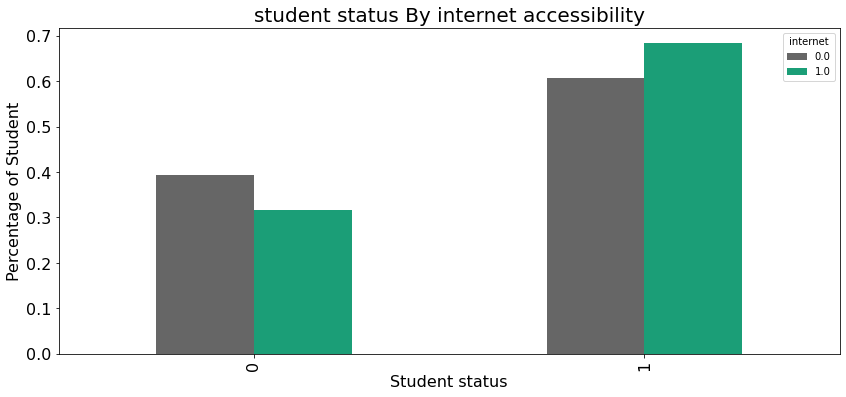

In [ ]:
alc_tab = pd.crosstab(index=df.passed, columns=df.internet)
alc_perc = alc_tab.apply(perc).reindex(index)
alc_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By internet accessibility', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)


C9:Most of people who passed the exam had the accessibility to internet ,sow we should provide a fair materials's education

#### b.10) Student status by wekelly Study time :

Text(0, 0.5, 'Percentage of Student')

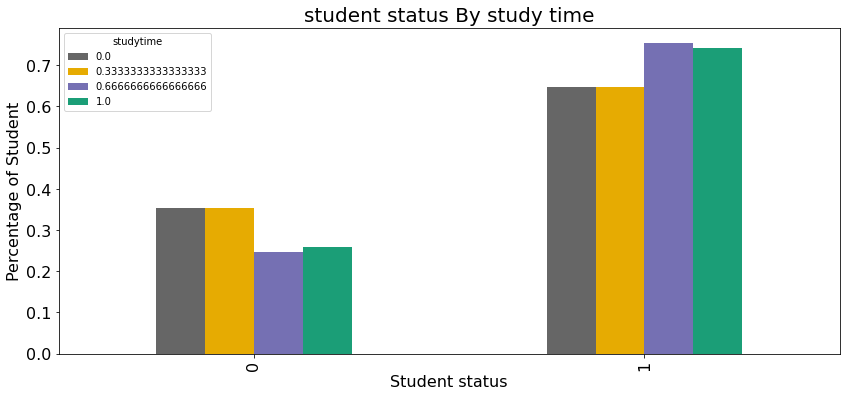

In [ ]:
stu_tab = pd.crosstab(index=df.passed, columns=df.studytime)
stu_perc = stu_tab.apply(perc).reindex(index)
stu_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By study time', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)


C10:Most of people who passed the exam study 5-10 hours weekely

#### b.11)Student status by health:

Text(0, 0.5, 'Percentage of Student')

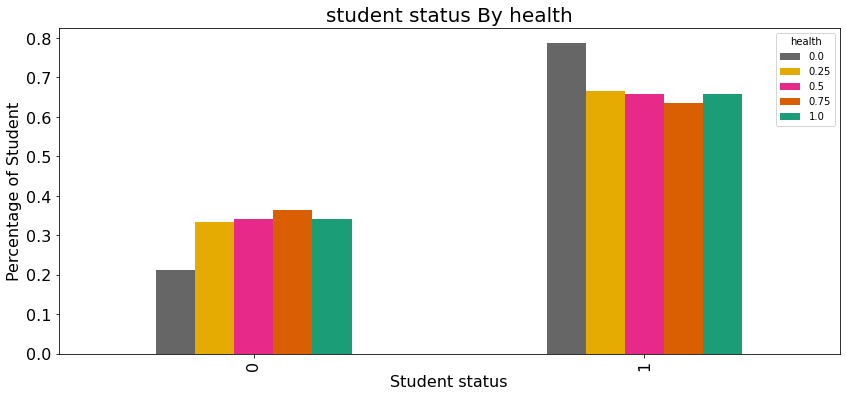

In [ ]:
he_tab = pd.crosstab(index=df.passed, columns=df.health)
he_perc = he_tab.apply(perc).reindex(index)
he_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By health', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)


C11:most of student who fails the exam don't have a good health

In [ ]:
#making summary for good condition to reach heigh academic potentials:

### 3) General conclusion :

#### Summary:

After dealing with the most relevent features ,the valedictorian of an exellents conditions for heigh academic  potentials is likely to have this profile:

1.Does not go out with friend frequently 

2.Is not in romantic relation

3.Parents receive higher education specialy woman

4.Have strong desire to receive higher education 

5.Mother is a health care professional

6.father is a teacher

7.No absences to classes

8.have access to internet

9.study more than 10 hours a week

10.Is healthy

# Logistic regression  <h5 style='color:red;font-family:cursive;font-size:4.5mm'>Réaliser par boujida hafssa </h5>

# 1-Logistic Regression implementation

In [ ]:
# split data train 70 % and test 30 %

data = df.to_numpy()
n = data.shape[1]
x = data[:,0:n-1]
y = data[:,n-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Once our data is split, we can forget about x_test and y_test until we define our model.
#x_train and y_train are the samples we will use to train the model

In [ ]:
# let's create a model and train it 

logisticRegr = LogisticRegression(C=1)

In [ ]:
#and now let's do the training

logisticRegr.fit(x_train,y_train)

LogisticRegression(C=1)

In [ ]:
#The model is now trained and ready to make predictions :) 

In [ ]:
y_pred=logisticRegr.predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.])

# 2-Model evaluation

In order to evaluate our model , we will first calculate the accuracy of the model , visualize the confusion matrix, and then plot the ROC curve.

In [ ]:
#let's have a look at the accuracy of the model

Sctest=logisticRegr.score(x_test,y_test)
Sctrain=logisticRegr.score(x_train,y_train)

print('#Accuracy test is: ',Sctest)
print('#Accuracy train is: ',Sctrain)


f1 = f1_score(y_test, y_pred, average='macro')

print('\n#f1 score is: ',f1)

#Accuracy test is:  0.6386554621848739
#Accuracy train is:  0.7463768115942029

#f1 score is:  0.5533734834598935


#
We got two values of the accuracy, one obtained with the training set and other with the test set.

It might be a good idea to compare the two, as a situation where the training set accuracy is much higher might indicate overfitting. The test set accuracy is more relevant for evaluating the performance on unseen data since it’s not biased.

In [ ]:
#let's have a look at the accuracy of the model

Sctest=logisticRegr.score(x_test,y_test)
Sctrain=logisticRegr.score(x_train,y_train)

print('Accuracy test is: ',Sctest)
print('Accuracy train is: ',Sctrain)

Accuracy test is:  0.6386554621848739
Accuracy train is:  0.7463768115942029


In [ ]:
#now, we can get the confusion matrix with confusion_matrix():

confusion_matrix(y_test, y_pred)

array([[12, 38],
       [ 5, 64]], dtype=int64)

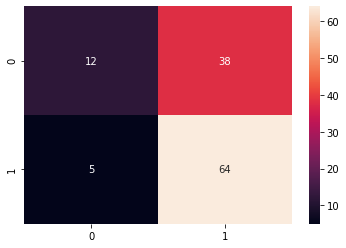

In [ ]:
#let's visualize the confusion matrix:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

We can now get the report on classification as a string or dictionary with classification_report():

In [ ]:
#import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.24      0.36        50
         1.0       0.63      0.93      0.75        69

    accuracy                           0.64       119
   macro avg       0.67      0.58      0.55       119
weighted avg       0.66      0.64      0.58       119



ROC CURVE

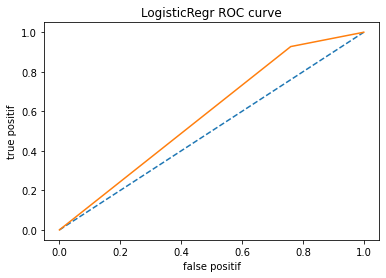

In [ ]:
#ploting the roc_curve

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='LogisticRegr')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('LogisticRegr ROC curve')
p=plt.show()

#we still need to improve our model in order to be more accurate!

# 3-improving model accuracy

Now, we are going to use random state to randomly split the data into training & test set.

The algorithm gives different accuracy each time we change the data split. And we know that if we built a good model, then the accuracy should not vary too much depending on the random state. 
...But still, we can train the model for some iterations and instead of using the values "0" and "1" for the random state, we will choose the value "optimal_state" that maximizes the accuracy and the F1 score for the iterations given.

In [ ]:
max_iteration = 0
maxF1 = 0
maxAccuracy = 0
optimal_state = 0
import random
for k in range(max_iteration):
    print ('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+ ', Current f1 : '+str(maxF1), end="\r")
    split_state = np.random.randint(1,100000000)-1
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=split_state)
    logisticRegr = LogisticRegression(C=1)
    logisticRegr.fit(x_train,y_train)
    y_pred=logisticRegr.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)*100
    
    if (accuracy>maxAccuracy and f1>maxF1):
        maxF1 = f1 
        maxAccuracy = accuracy
        optimal_state = split_state
    
   
optimal_state = 85491961
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=optimal_state)
logisticRegr = LogisticRegression(C=1)
logisticRegr.fit(x_train,y_train)
y_pred=logisticRegr.predict(x_test)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)*100
print('\n\n\n*Accuracy is: '+str(accuracy)+'\n*f1 score is: ',f1)

yt_lg,yp_lg = y_test,y_pred
#ploting the roc_curve

print ( '\n\n *the ROC curve: ')

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='LogisticRegr')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('LogisticRegr ROC curve')
p=plt.show()


#visualizig the confusion matrix:

print (' *the confusion matrix ')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

NameError: ignored

# conclusion
we notice that we went from an accuracy of 64% to 80.67%.
and we got a higher value for F1 score as well ; from 0.55 to 0.74  . 

# k-nearest neighbors <h5 style='color:red;font-family:cursive;font-size:4.5mm'>Réaliser par el nabaoui nouhaila </h5>

<img src='plots\visualisation.images\knn.png' width='400cm' height='400cm'>

---------------------------------# **Réalisée par el nabaoui nouhaila** #------------------------------------------------------------

<h5 style='color:red;font-family:cursive;font-size:4.5mm'> 1 the Goals of this part:</h5>

- in this part we are trying to achieve the following goals:

   - understand knn algorithm and its parameters
   - understand the imapct of knn_hyper_parameters_tuning
   - using multiple method to make the acquracy better
   - finding the best model that provides us with the higher accuracy

<h5 style='color:red;font-family:cursive;font-size:4.5mm'> 2 KNN INTRODUCTION:</h5>

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well :

Lazy learning algorithm:
    
    − KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification
    
Non-parametric learning algorithm:
    
    − KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.

<h5 style='color:red;font-family:cursive;font-size:4.5mm'>3 Implementation :</h5>

In [ ]:
#define data
y=df.passed
target=["passed"]
x = df.drop(target,axis = 1 )

<h5 style='color:blue;font-family:cursive;font-size:4.5mm'>First step: </h5>

Before tuning  the parameters of knn algorithme(value of K,metrics)it could be a good idea to tune the optimal random state before spliting the data and fit it to knn.For this reason we are going to choose as previosely a method that return the "optimal_state" that maximizes the accuracy and the F1 score for the iterations given.

In this step we will not specify the parameters of knn specially the k_value and metrics and after we will evaluate the model and try to understand the impact of knn_hyper_parameters_tuning.




*Accuracy is: 78.15126050420169
*f1 score is:  0.7102996254681648
random_state is  71027464


 *the ROC curve: 


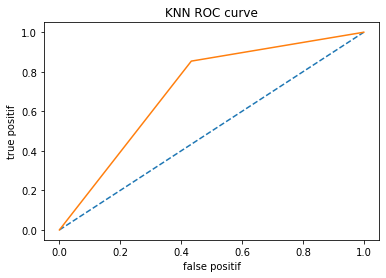

 *the confusion matrix 


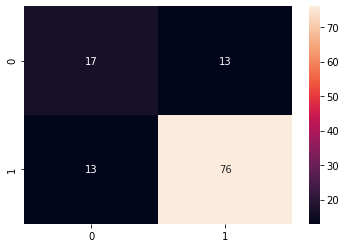

In [ ]:
max_iteration = 0
maxF1 = 0
maxAccuracy = 0
optimal_state = 0
for k in range(max_iteration):
    print ('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+ ', Current f1 : '+str(maxF1), end="\r")
    split_state = np.random.randint(1,100000000)-1
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=split_state)
    KNN = KNeighborsClassifier()
    KNN.fit(x_train,y_train)
    y_pred=KNN.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)*100
    
    if (accuracy>maxAccuracy and f1>maxF1):
        maxF1 = f1 
        maxAccuracy = accuracy
        optimal_state = split_state
    
optimal_state = 71027464

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=optimal_state)
KNN= KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)*100
print('\n\n\n*Accuracy is: '+str(accuracy)+'\n*f1 score is: ',f1)

print ('random_state is ',optimal_state)


#ploting the roc_curve

print ( '\n\n *the ROC curve: ')

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='knn')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('KNN ROC curve')
p=plt.show()

yt_knn,yp_knn= y_test,y_pred
#visualizig the confusion matrix:

print (' *the confusion matrix ')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

As we can see the best random state are 71027464  corresponding to an accuracy of **78%** wish is a good accuracy

### Model evaluation :

-we evaluate this model and see the impact of knn_parameters by using a roc curv and a confusion matrix and f1 score.
Using this model i got an accuracy of **78%** wish is a good accuracy and f1 score is **70%**

<h5 style='color:blue;font-family:cursive;font-size:4.5mm'>Second step: </h5>

In this step we will try to tune parameters related to knn algorithm (choice of k_value,metric=distance) by using 3 methods :

   - 1.by visualisation
   - 2.by using gridsearchCV
   - 3.by fixing the possible k_values  and searching for best metrics

<h5 style='color:green;font-family:cursive;font-size:4.5mm'>Method 1: (by visualisation) </h5>

-In tis method we are going to choose best K base on visualisation:



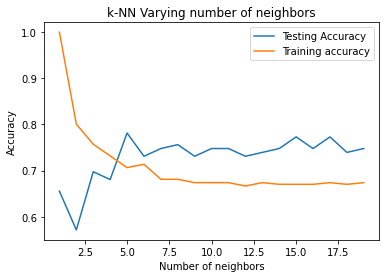

In [ ]:
#Setup arrays to store training and test accuracies
neighbors= np.arange(1,20)
train_accuracy =np.empty(19)
test_accuracy = np.empty(19)

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 
    
#  Plotting the curv
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show() 

In our case study we had a binary classification sow it could be better to choose an odd value of K.
 By looking into the curv We can observe above that we get maximum testing accuracy for **k=5** .In next step let's confirm if 5 was a good choice by using gridsearchCV. 

<h5 style='color:green;font-family:cursive;font-size:4.5mm'>Method 2: (using GridSearchCV)</h5>

In this step we will confirm if our tuning is correct for k_value by using gridsearch cross-validation .
    "Hyperparameter tuning is used in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use **GridSearchCV** to automate the tuning of hyperparameters.

**1) best k for training:**

In [ ]:
#In case of classifier like knn the parameter to be tuned is n_neighbors 
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train,y_train)
#best score\n",
knn_cv.best_score_

0.6449350649350649

In [ ]:
knn_cv.best_params_

{'n_neighbors': 19}

**2) best k for testing:**

In [ ]:
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_test,y_test)
#best score\n",
knn_cv.best_score_

0.7728260869565217

In [ ]:
knn_cv.best_params_

{'n_neighbors': 13}

**2) best k for all the dataset:**

In [ ]:
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)
#best score\n",
knn_cv.best_score_

0.6734177215189873

In [ ]:
knn_cv.best_params_

{'n_neighbors': 7}

**To conclude the best k for:**

1)training is :**19**

2)testing is :**13**

3)all the dataset:**7**

-----------------------------we had 2 choices **k=7** and **k=19** (choosing odd number for binary classification)-----------------------------------------------


<h5 style='color:green;font-family:cursive;font-size:4.5mm'>Method 3: </h5>

In this method we are going to fixe the value of k to k= 17 and  search for Best metric(distance)  based on time and acc .

In [ ]:
params = {"n_neighbors":[7,19] , "metric":["euclidean", "manhattan", "chebyshev"]}
acc = {}

for m in params["metric"]:
    acc[m] = []
    for k in params["n_neighbors"]:
        print("Model_{} metric: {}, n_neighbors: {}".format(i, m, k))
        i += 1
        t = time()
        knn = KNeighborsClassifier(n_neighbors=k, metric=m)
        knn.fit(x_train,y_train)
        pred = knn.predict(x_test)
        print("Time: ", time() - t)
        acc[m].append(accuracy_score(y_test, y_pred))
        print("Acc: ", acc[m][-1])

Model_18 metric: euclidean, n_neighbors: 7
Time:  0.022012710571289062
Acc:  0.7815126050420168
Model_19 metric: euclidean, n_neighbors: 19
Time:  0.01901412010192871
Acc:  0.7815126050420168
Model_20 metric: manhattan, n_neighbors: 7
Time:  0.021016359329223633
Acc:  0.7815126050420168
Model_21 metric: manhattan, n_neighbors: 19
Time:  0.02701735496520996
Acc:  0.7815126050420168
Model_22 metric: chebyshev, n_neighbors: 7
Time:  0.02001166343688965
Acc:  0.7815126050420168
Model_23 metric: chebyshev, n_neighbors: 19
Time:  0.02001476287841797
Acc:  0.7815126050420168


As  We can see  the  metrics or distances gives the same accuracy  but time is different,the optimal_time for k=7 is   0.019012451171875 . This choice  gives heigh Acc=78% with less time consuming compared to other distances the wining distance is **chebyshev**

<h5 style='color:blue;font-family:cursive;font-size:4.5mm'>third step: </h5>

In this method we are going to commbine **knn hyperparameters tuning** (second step) and  **the  optimal random state**(first step) to get high accuracy

### B)Final model implementation

As we discover in privious section the best parameters to implement knn algorithme are:
   - K=7
   - metric=chebyshev-distance

In [ ]:
max_iteration = 0
maxF1 = 0
maxAccuracy = 0
optimal_state = 0
f1 = 0
accuracy = 0
True60 = False
for k in range(max_iteration):
    print ('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+ ', Current f1 : '+str(maxF1), end="\r")
    split_state = np.random.randint(1,100000000)-1
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=split_state)
    KNN = KNeighborsClassifier(n_neighbors=7,metric='chebyshev')
    KNN.fit(x_train,y_train)
    y_pred=KNN.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)*100
    
    if accuracy>maxAccuracy and f1>=0.5:
        maxF1 = f1 
        maxAccuracy = accuracy
        optimal_state = split_state
        if maxAccuracy>79:
            break
    
optimal_state = 29300362         
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=optimal_state)
KNN_f= KNeighborsClassifier(n_neighbors=7,metric='chebyshev')
KNN_f.fit(x_train,y_train)
y_pred=KNN_f.predict(x_test)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)*100
print('\n\n\n*Accuracy is: '+str(accuracy)+'\n*f1 score is: ',f1)

print ('random_state is ',optimal_state)

yt_knn,yp_knn= y_test,y_pred






*Accuracy is: 79.83193277310924
*f1 score is:  0.5423076923076924
random_state is  29300362


**-As we can see if we combine the best knn parameters and optimal state the acquracy improve from 78% to 79%**
It's clear that hyperparameters_tuning increase the result but most impactfull parameters are random_state

<h5 style='color:blue;font-family:cursive;font-size:4.5mm'>forth step: </h5>

**To evaluate our  model we are going to**
- use heatmap (matrice de confusion )
- use the precision recall and  F1 score for each class
- plotting the roc curve


1)**Confusion matrix**

Accuracy is:  0.7983193277310925


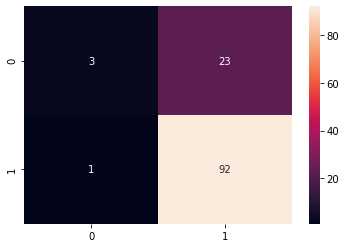

In [ ]:
ac = accuracy_score(yt_knn,yp_knn)
print('Accuracy is: ',ac)
cm= confusion_matrix(yt_knn,yp_knn)
sns.heatmap(cm,annot=True)
yt_knn,yp_knn = y_test,y_pred

2)**classification_report**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.12      0.20        26
         1.0       0.80      0.99      0.88        93

    accuracy                           0.80       119
   macro avg       0.78      0.55      0.54       119
weighted avg       0.79      0.80      0.74       119



 the ROC curve: 


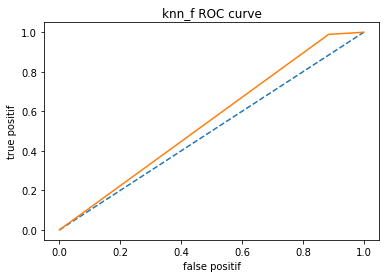

In [ ]:
#ploting the roc_curve

print ( ' the ROC curve: ')

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='final knn model')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('knn_f ROC curve')
p=plt.show()


<h5 style='color:red;font-family:cursive;font-size:4.5mm'> 4 Conclusion :</h5>

The main goal of this part was to understand the impact of knn_hyper_parameters_tuning. As a first step we implement a model that tune the optimal random_state without specifying knn_parameters, after we evaluate the model and we get an accuracy of 78%,next we search to increase this accuracy by fitting the model with the best parameters for that we search at first for the best k using the gridsearchCV and after we fix the best value of k and search for The best metrics. Finally, we got the best model with k=17 and metrics=chebychev and we got a better accuracy of 79% as we can see the impact of hyper_parameters wasn't so strong  the importent parameter is the randome_state.

# Comparison of the three algorithms <h5 style='color:red;font-family:cursive;font-size:4.5mm'>Réalisé par Mohammed AL JADD </h5>

- **Now let's we will compare the three classfiers that have been train by all the project members**.
- The metrics that we will be using to compare between those three algorithms are :
    - F1 score.
    - Accuracy score.
    - Confusion matrix.
    - ROC curve.
    - ROC score.
    
- This will be done by just calling the following function:
    
```python
def compare_lg_knn_svm(yt_knn,yp_knn,yt_lg,yp_lg,yt_svm,yp_svm)
```

- *Arguments* :
    - yt_knn : $y_{test}$ used in knn algorithm.
    - yp_knn : $y_{predicted}$ by knn algorithm.
    - yt_lg : $y_{test}$ used in logistic regression algorithm.
    - yp_lg : $y_{predicted}$ by logistic regression  algorithm.
    - yt_svm : $y_{test}$ used in svm algorithm.
    - yp_svm $y_{predicted}$ by svm algorithm.
    
- *Results* :
        - A table containing all metrics.
        - A graph containing the three ROC curves.
        - A table giving the good metric. For exmaple, f1 score is maximal for KNN learning algorithms.
        
- After that, we will choose the algorithm that seems to us the more accurate and also the one that do not neither overfit nor underfit by just seeing the other metrics such f1 score.
   
- **The following function is going to return the name of algorithm having the max metric value**

```python
def algo_with_max_metric(a,b,c)
```


In [ ]:
# Function to compare the three classifiers (Logistic regression, KNN and SVM) performances :

def compare_lg_knn_svm(yt_knn,yp_knn,yt_lg,yp_lg,yt_svm,yp_svm):
    #F1 score
    f1_lg = round(f1_score(yt_lg, yp_lg, average='macro')*100)
    f1_knn = round(f1_score(yt_knn, yp_knn, average='macro')*100)
    f1_svm = round(f1_score(yt_svm, yp_svm, average='macro')*100)
    
    #Accuracy score
    acc_lg = round(accuracy_score(yt_lg, yp_lg)*100)
    acc_knn = round(accuracy_score(yt_knn, yp_knn)*100)
    acc_svm = round(accuracy_score(yt_svm, yp_svm)*100)
    
    #Confusion matrix
    conf_lg = confusion_matrix(yt_lg, yp_lg)
    conf_knn = confusion_matrix(yt_knn, yp_knn)
    conf_svm = confusion_matrix(yt_svm, yp_svm)
    
    #ROC score
    roc_c_lg = round(roc_auc_score(yt_lg, yp_lg)*100)
    roc_c_knn = round(roc_auc_score(yt_knn, yp_knn)*100)
    roc_c_svm = round(roc_auc_score(yt_svm, yp_svm)*100)
    
    #ROC curve thresholds
    roc_knn = roc_curve(yt_knn,yp_knn)
    roc_lg = roc_curve(yt_lg,yp_lg)
    roc_svm = roc_curve(yt_svm,yp_svm)
    
    # Table of metrics
    print('-----------------------------Table of metrics--------------------------------------\n\n')
    data_rows = [('f1 score',f1_lg,f1_knn,f1_svm),
                 ('','','',''),
                  ('accuracy %',acc_lg,acc_knn,acc_svm),
                 ('','','',''),
                 ('confusion matrix',conf_lg[0], conf_knn[0], conf_svm[0]),
                ('',conf_lg[1], conf_knn[1], conf_svm[1]),
                 ('','','',''),
                ('ROC score',roc_c_lg,roc_c_knn,roc_c_svm)]
    t = Table(rows=data_rows, names=('metric','Logistic regression', 'KNN', 'SVM'))
    print(t)
    
    #Plot ROC curve
    print('\n\n-----------------------------ROC curves--------------------------------------\n\n')
    fig, _ = plt.subplots()
    fig.suptitle('Comparison of three ROC curves')
    fpr,tpr,thresholds=roc_lg
    plt.plot([0, 1],[0, 1],'--')
    plt.plot(fpr,tpr,label='Logistic regression :'+str(roc_c_lg))
    plt.xlabel('false positive')
    plt.ylabel('false negative')
    fpr,tpr,thresholds=roc_knn
    plt.plot(fpr,tpr,label='KNN :'+str(roc_c_knn))
    fpr,tpr,thresholds=roc_svm
    plt.plot(fpr,tpr,label='SVM :'+str(roc_c_svm))
    plt.legend()
    plt.show()
    
    
    # Maximum metrics
    print('-----------------------------Max of metrics--------------------------------------\n\n')
    data_rows = [('max f1 score',algo_with_max_metric(f1_lg,f1_knn,f1_svm)),
                 ('','','',''),
                  ('max accuracy %',algo_with_max_metric(acc_lg,acc_knn,acc_svm)),
                 ('','','',''),
                ('max ROC score',algo_with_max_metric(roc_c_lg,roc_c_knn,roc_c_svm))]
    t = Table(rows=data_rows, names=('metric','Learning algorithm winnig'))
    print(t)
    
# Function returning name of winnig algorithm based on a single metric
def algo_with_max_metric(a,b,c):
    max_metric = max(a,b,c)
    if max_metric == a:
        return 'Logistic regression'
    elif max_metric == b:
        return 'KNN'
    else:
        return 'SVM'

-----------------------------Table of metrics--------------------------------------


     metric      Logistic regression   KNN     SVM  
---------------- ------------------- ------- -------
        f1 score                74.0    54.0    82.0
                                                    
      accuracy %                81.0    80.0    84.0
                                                    
confusion matrix             [18 17] [ 3 23] [15  8]
                             [ 6 78] [ 1 92] [ 2 39]
                                                    
       ROC score                72.0    55.0    80.0


-----------------------------ROC curves--------------------------------------




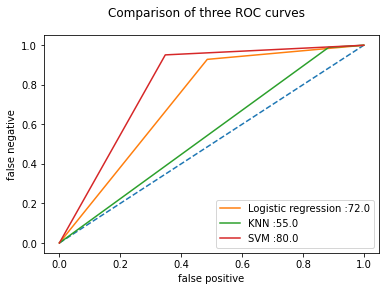

-----------------------------Max of metrics--------------------------------------


    metric     Learning algorithm winnig
-------------- -------------------------
  max f1 score                       SVM
                                        
max accuracy %                       SVM
                                        
 max ROC score                       SVM


In [ ]:
compare_lg_knn_svm(yt_knn,yp_knn,yt_lg,yp_lg,yt_svm,yp_svm)

<h3><span style='color:#e34c00;font-family:Comic Sans MS'>Conclusion of selected classifier for our problem :</span></h3>

- As you can see the classifier with high metrics is the support vector machine classifier with high accuracy of **84%**, the confusion matrix is roughly diagonal which indicate that this classifier is able to label data correctly. If we see other metrics such as f1 score, we managed to have a good value of 0.82 which means that we have low false positives and low false negatives.

- Now let's go back and see the **advices** given for studens, parents and administration. Just <a href='#Advices-for-students:'> <span style='color:red;text-decoration: none'> Click here!</span></a>

# Conclusion  </h5>

    Improving the educational system is a big deal, As student engineers, we can contribute to realizing this goal by using technologies and study resources like machine learning materials ,to come up with an innovative solution to help the student in need especially student who live in hard conditions (demographic, social and educational problems). In this project, we come up with the idea to build a model that predicts student status based on different features. Our main challenges were to define the best classification algorithm and to identify the most impactful factors for student academic status,to provide them with a summary or valedictorian of student’s best conditions to reach high academics status and avoid failure. For this project entitled “”Students-performance and difficulties prediction””, we used several methods for classification such as logistic regression, KNN, and SVM and we evaluate this model using different metrics like f1 score, roc curve, and confusion matrix and finally we got a winner which SVM with an accuracy of 84% compared to KNN and logestic regression. Before achieving our main challenges they were several steps to take: -data processing -data visualization -Models implementation -comparison of 3 algorithm

<a href='#Students-performance-and-difficulties-prediction'><span style='color:red;text-decoration: none;font-family:cursive'><h4>Go Back!</h4></span></a>